In [1]:
#!pip install pyswisseph
#!pip install geopy
import matplotlib.pyplot as plt
import numpy as np

from geopy.geocoders import Nominatim
import swisseph as swe
from datetime import datetime

In [3]:
!pip list -freeze > req.txt

In [5]:
#!pip install pyswisseph
!pip freeze >req.txt 

In [28]:

def calculate_kundali(birthdate, birthtime, birthplace_lat, birthplace_lon):
    # Combine birthdate and birthtime into a single datetime object
    birth_datetime = datetime.strptime(f"{birthdate} {birthtime}", "%Y-%m-%d %H:%M:%S")

    # Convert datetime to Julian Day
    julian_day = swe.julday(birth_datetime.year, birth_datetime.month, birth_datetime.day, 
                            birth_datetime.hour + birth_datetime.minute / 60.0 + 
                            birth_datetime.second / 3600.0)

    # Set geographic location
    swe.set_topo(birthplace_lon, birthplace_lat, 0)

    # Calculate the positions of the planets
    planets = [swe.SUN, swe.MOON, swe.MERCURY, swe.VENUS, swe.MARS, swe.JUPITER, 
               swe.SATURN, swe.URANUS, swe.NEPTUNE, swe.PLUTO]
    planet_positions = {}

    for planet in planets:
        position = swe.calc_ut(julian_day, planet)[0]
        planet_positions[swe.get_planet_name(planet)] = position

    # Calculate the Ascendant (Lagna)
    ascendant = swe.houses(julian_day, birthplace_lat, birthplace_lon, b'A')[0][0]

    return ascendant, planet_positions

# Function to plot the Kundali (Birth Chart)
def plot_kundali(ascendant, planet_positions):
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw = {'projection':'polar'})
    ax.set_theta_direction(-1)
    ax.set_theta_offset(np.pi/2.0)
    ax.set_yticklabels([])
    ax.plot([np.deg2rad(ascendant), np.deg2rad(ascendant)], [0,1], label = 'Ascendent (Lagna)', color = 'red')

    for planet, position in planet_positions.items():
        ax.plot([np.deg2rad(position), np.deg2rad(position)], [0,1], label = planet)
    
    # Add labels for the planets
    for planet, position in planet_positions.items():
        ax.text(np.deg2rad(float(position[0])), 1.05, planet, 
                horizontalalignment="center", verticalalignment="center")

    # Add labels for the houses
    house_labels = ['1st House', '2nd House', '3rd House', '4th House', '5th House', 
                    '6th House', '7th House', '8th House', '9th House', '10th House', 
                    '11th House', '12th House']
    
    for i, label in enumerate(house_labels):
        angle = np.deg2rad(ascendant + i * 30 % 360)
        ax.text(angle, 1.15, label, horizontalalignment="center", 
                verticalalignment="center")

    #ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))
    plt.title("Kundali (Birth Chart)")
    plt.show()


In [29]:
def get_lat_lon(address):
    geolocator = Nominatim(user_agent="geo_locator")
    location = geolocator.geocode(address)
    if location:
        return location.latitude, location.longitude
    else:
        return None

In [ ]:
birthdate = '1997-09-18'#yyyy-mm-dd
birthtime = '10::00' #hh:mm:ss
birthplace = 'ahmedabad, India' #city, country
lat, long = get_lat_lon(birthplace)
lat, long


(23.0215374, 72.5800568)

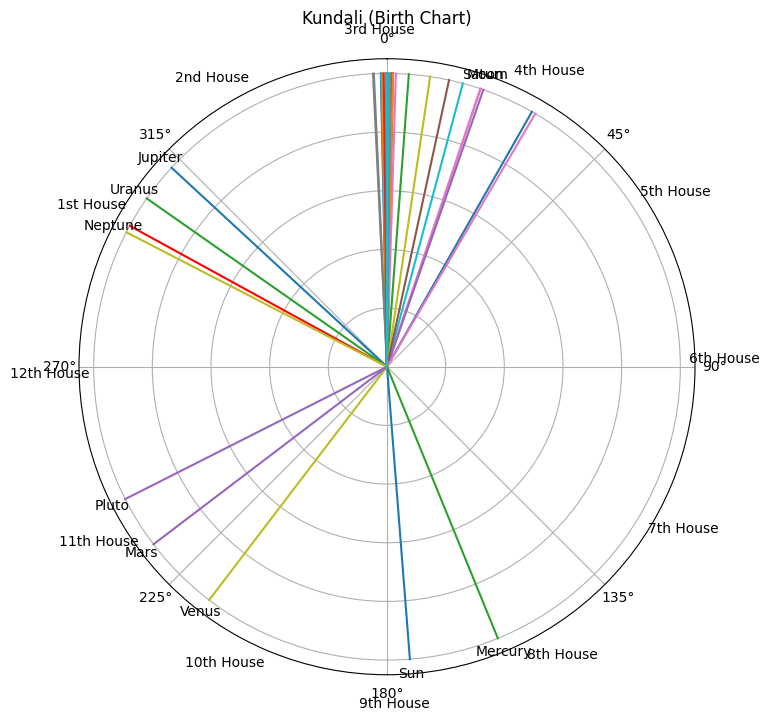

In [31]:
ascendant, planet_positions = calculate_kundali(birthdate, birthtime, lat, long)
plot_kundali(ascendant, planet_positions)